In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, auc, classification_report)
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

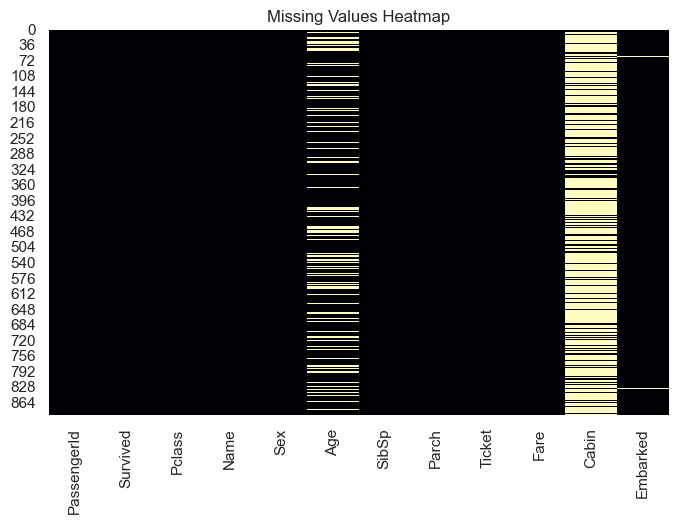

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
print(df.head())
print(df.info())
print(df.describe(include='all'))
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title("Missing Values Heatmap")
plt.show()

In [3]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

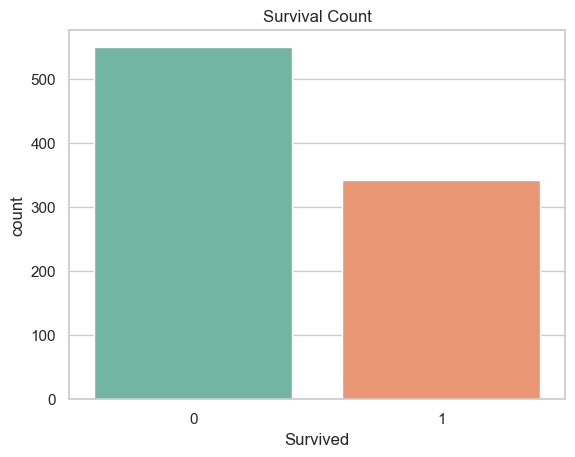

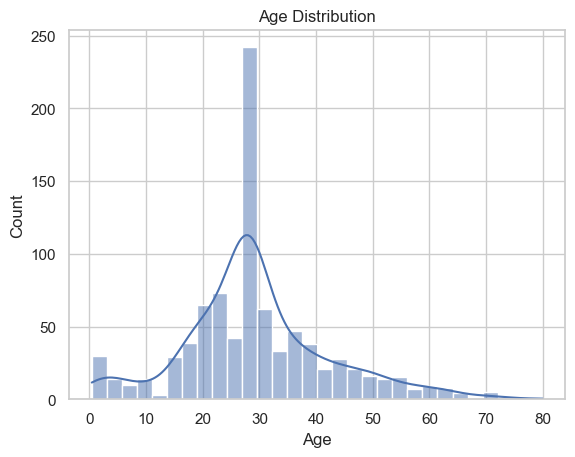

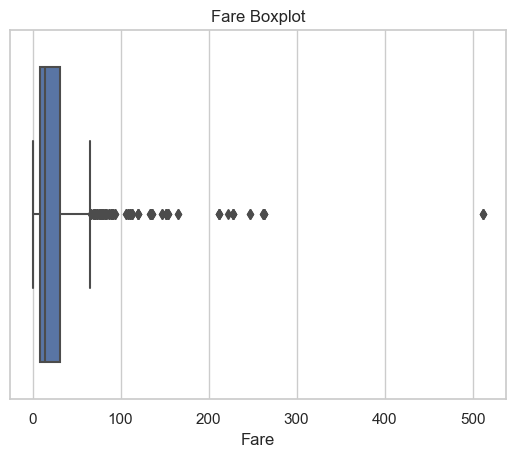

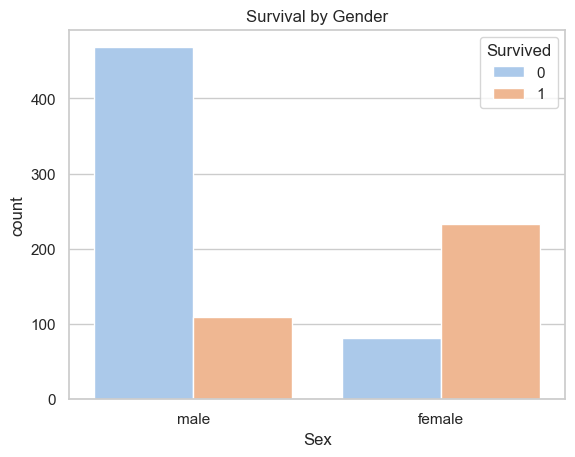

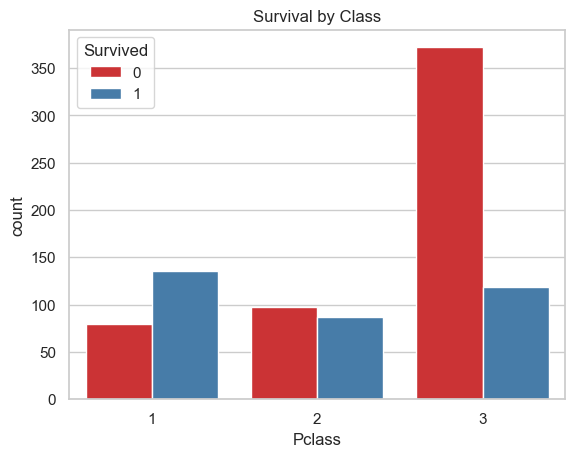

In [4]:
sns.countplot(data=df, x='Survived', palette='Set2')
plt.title("Survival Count")
plt.show()
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()
sns.boxplot(x=df['Fare'])
plt.title("Fare Boxplot")
plt.show()
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')
plt.title("Survival by Gender")
plt.show()
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title("Survival by Class")
plt.show()

In [5]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
X = df.drop('Survived', axis=1)
y = df['Survived']
X_selected = SelectKBest(score_func=chi2, k=5).fit_transform(X, y)

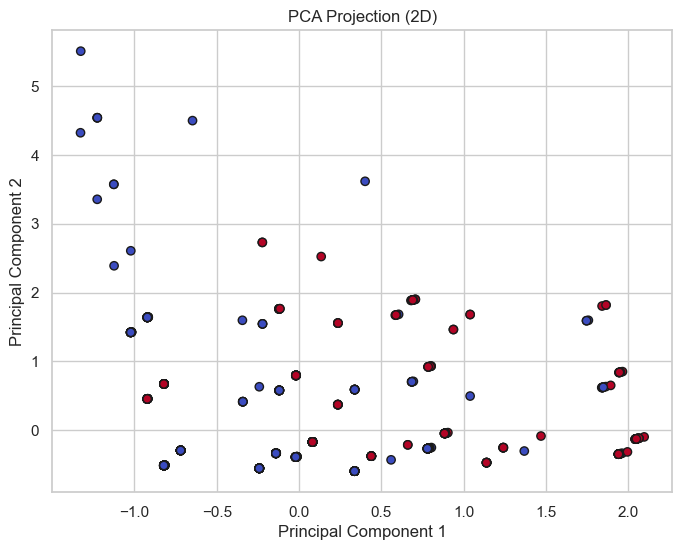

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("PCA Projection (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
grid = GridSearchCV(rf, params, cv=5)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Cross-validation scores: [0.82517483 0.75524476 0.81690141 0.78169014 0.83802817]
Mean CV Score: 0.803407859745888
Best Parameters: {'max_depth': 5, 'n_estimators': 100}


Accuracy: 0.8156424581005587
Precision: 0.8360655737704918
Recall: 0.6891891891891891
F1 Score: 0.7555555555555555
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



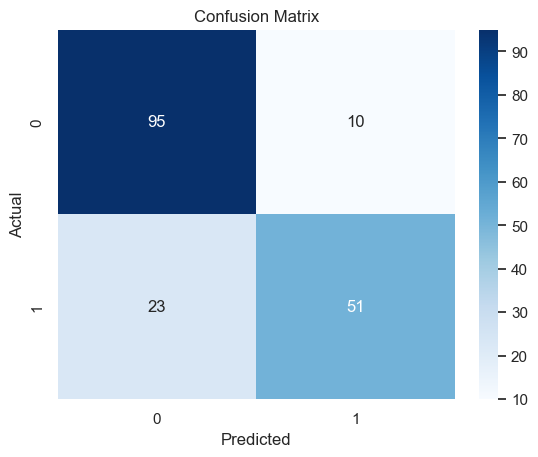

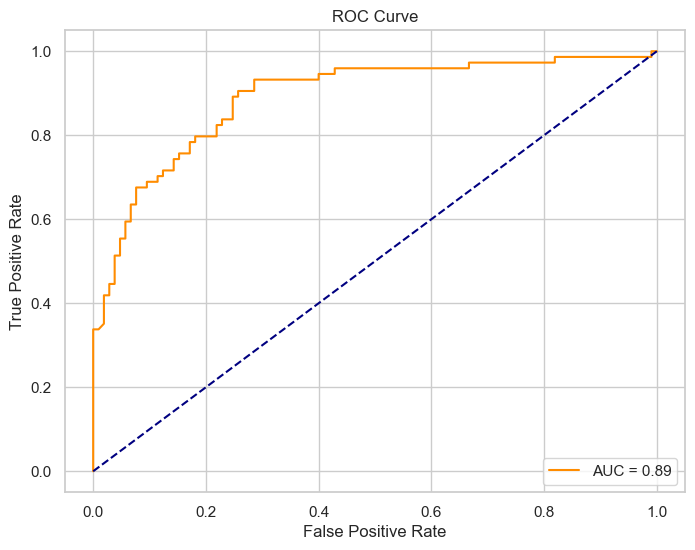

In [10]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()